In [2]:
#import libraries
import pandas as pd
import numpy as np
import os, sys
import matplotlib.pyplot as pplot
import tensorflow as tf
from keras.applications.resnet50 import preprocess_input
from keras.losses import binary_crossentropy
from keras import layers
import keras
import cv2
import random
import pickle

In [3]:
os.chdir('D:/HomeworkAndRevision/uni/PRoject')
os.getcwd()

'D:\\HomeworkAndRevision\\uni\\PRoject'

In [4]:
SplitSet = pd.read_csv('trainLabelsSet.csv')

x = SplitSet['image']
y = SplitSet['level']


In [5]:
count = 0
for item in x:
    path = "D:/HomeworkAndRevision/uni/PRoject/train/"+x[count]+".JPEG"
    if y[count]==1:
        os.rename(path, "D:/HomeworkAndRevision/uni/PRoject/eyeDR/"+x[count]+".JPEG")
        count = count + 1
    else:
        os.rename(path, "D:/HomeworkAndRevision/uni/PRoject/eyeClear/"+x[count]+".JPEG")
        count = count + 1
print("split complete")
    

split complete


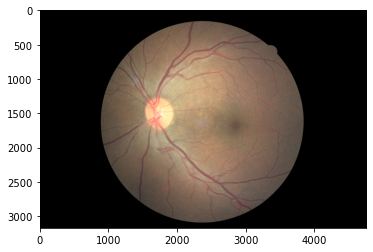

In [4]:
Sets = ["eyeClear","eyeDR"]
Directory = 'D:/HomeworkAndRevision/uni/PRoject/'
for folder in Sets:
    path = os.path.join(Directory, folder)
    for image in os.listdir(path):
        img = cv2.imread(os.path.join(path,image))
        pplot.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        pplot.show()
        break
    break

In [ ]:
trainingData = []
imgSize = 224
def createTrainData():
    for folder in Sets:
        print("folder")
        path = os.path.join(Directory, folder)
        classNum = Sets.index(folder)
        for image in os.listdir(path):
            img = cv2.imread(os.path.join(path,image))
            newImg = cv2.resize(img, (imgSize, imgSize))
            trainingData.append([newImg, classNum])


In [ ]:
print("start")
createTrainData()
print(len(trainingData))

In [ ]:
random.shuffle(trainingData)

In [ ]:
x = []
y = []
for features, label in trainingData:
    x.append(features)
    y.append(label)

x = np.array(x).reshape(-1, 224, 224, 3)
x.shape

In [ ]:
x = x/255.0;
y = np.array(y)

In [ ]:
pickleOut = open("x.pickle","wb")
pickle.dump(x, pickleOut)
pickleOut.close()

pickleOut = open("y.pickle","wb")
pickle.dump(y, pickleOut)
pickleOut.close()

In [ ]:
pickleIn = open("x.pickle","rb")
x = pickle.load(pickleIn)

pickleIn = open("y.pickle","rb")
y = pickle.load(pickleIn)

In [5]:
model = tf.keras.applications.mobilenet.MobileNet()

In [6]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [7]:
baseInput = model.layers[0].input
baseOutput = model.layers[-4].input

In [8]:
flatLayer = layers.Flatten()(baseOutput)
finalOutput = layers.Dense(1)(flatLayer)
LastOutput = layers.Activation('sigmoid')(finalOutput)

In [9]:
newModel = keras.Model(inputs = baseInput, outputs = LastOutput)
newModel.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)     

In [ ]:
newModel.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
newModel.fit(x,y, epochs = 3, validation_split = 0.1)

In [ ]:
trainingDataGrey = []
imgSize = 224
def createTrainDataGreyscale():
    for folder in Sets:
        print("folder")
        path = os.path.join(Directory, folder)
        classNum = Sets.index(folder)
        for image in os.listdir(path):
            img = cv2.imread(os.path.join(path,image))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            newImg = cv2.resize(img, (imgSize, imgSize))
            trainingDataGrey.append([newImg, classNum])
print("start")
createTrainDataGreyscale()
print(len(trainingDataGrey))
random.shuffle(trainingDataGrey)

In [ ]:
x = []
y = []
for features, label in trainingDataGrey:
    x.append(features)
    y.append(label)

x = np.array(x).reshape(-1, 224, 224, 3)
x = x/255.0;
y = np.array(y)

In [ ]:
pickleOut = open("x.pickle","wb")
pickle.dump(x, pickleOut)
pickleOut.close()

pickleOut = open("y.pickle","wb")
pickle.dump(y, pickleOut)
pickleOut.close()

pickleIn = open("x.pickle","rb")
x = pickle.load(pickleIn)

pickleIn = open("y.pickle","rb")
y = pickle.load(pickleIn)

In [ ]:
newModel.fit(x,y, epochs = 3, validation_split = 0.1)

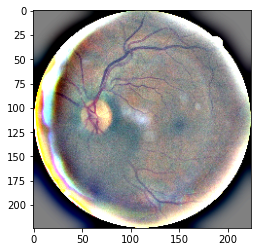

In [18]:
def cropImage(image,tol=7):
    if image.ndim ==2:
        mask = image>tol
        return image[np.ix_(mask.any(1),mask.any(0))]
    elif image.ndim==3:
        gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        mask = gray_image>tol

        image1=image[:,:,0][np.ix_(mask.any(1),mask.any(0))]
        image2=image[:,:,1][np.ix_(mask.any(1),mask.any(0))]
        image3=image[:,:,2][np.ix_(mask.any(1),mask.any(0))]
        image = np.stack([image1,image2,image3],axis=-1)
        return image
    
def CropAndBlur(image, sigmaX=10):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cropImage(image)
    image = cv2.resize(image, (imgSize, imgSize))
    image=cv2.addWeighted( image, 4, cv2.GaussianBlur( image , (0,0) , sigmaX) ,-4 ,128)

    return image
imgSize = 224
image = cv2.imread("D:/HomeworkAndRevision/uni/PRoject/eyeClear/21_left.JPEG")
image = CropAndBlur(image)
pplot.imshow(image)

In [11]:
trainingDataGB = []
imgSize = 224
def createTrainDataGreyBlurred():
    for folder in Sets:
        print("folder")
        path = os.path.join(Directory, folder)
        classNum = Sets.index(folder)
        for image in os.listdir(path):
            image = cv2.imread(os.path.join(path,image))
            image = CropAndBlur(image)
            trainingDataGB.append([image, classNum])
print("start")
createTrainDataGreyBlurred()
print(len(trainingDataGB))
random.shuffle(trainingDataGB)

start
folder
folder
11168


In [12]:
x = []
y = []
for features, label in trainingDataGB:
    x.append(features)
    y.append(label)

x = np.array(x).reshape(-1, 224, 224, 3)
x = x/255.0;
y = np.array(y)

In [13]:
pickleOut = open("x.pickle","wb")
pickle.dump(x, pickleOut)
pickleOut.close() 

pickleOut = open("y.pickle","wb")
pickle.dump(y, pickleOut)
pickleOut.close()

pickleIn = open("x.pickle","rb")
x = pickle.load(pickleIn)

pickleIn = open("y.pickle","rb")
y = pickle.load(pickleIn)

In [14]:
newModel.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
newModel.fit(x,y, epochs = 3, validation_split = 0.1)

Epoch 1/3
315/315 [==============================] - 1608s 5s/step - loss: 0.6864 - accuracy: 0.6390 - val_loss: 1.2060 - val_accuracy: 0.6267
Epoch 2/3
315/315 [==============================] - 1587s 5s/step - loss: 0.5490 - accuracy: 0.7255 - val_loss: 0.7425 - val_accuracy: 0.6401
Epoch 3/3
315/315 [==============================] - 1642s 5s/step - loss: 0.4917 - accuracy: 0.7639 - val_loss: 0.6484 - val_accuracy: 0.7001


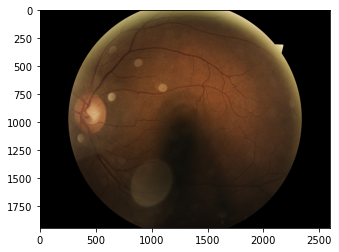

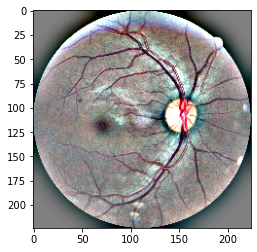

In [46]:
TestImage = cv2.imread("train/10199_right.JPEG")
TestImage = CropAndBlur(TestImage)
pplot.imshow(TestImage)
TestImage = np.array(TestImage).reshape(-1, 224, 224, 3)
TestImage = TestImage/255.0
pickleOut = open("TestImage.pickle","wb")
pickle.dump(TestImage, pickleOut)
pickleOut.close() 

pickleIn = open("TestImage.pickle","rb")
TestImage = pickle.load(pickleIn)

In [47]:
Prediction = newModel.predict(TestImage)
Prediction

array([[0.13460219]], dtype=float32)